## 分析目的
### 对2019年1月~2020年3月发布的视频进行分析，挑选出视频质量高，值得关注的up主

## 数据来源
### 分析数据基于 bilibili 网站上的公开信息，主要爬取了以下数据维度：
### 2019年1月~2020年3月，科技区播放量过5w视频的分区名称、作者名称、作者id、发布时间、播放数、硬币数、弹幕数、收藏数、点赞数、分享数、评论数，共计50130行

## 导入数据

In [15]:
import numpy as np
import pandas as pd

In [103]:
data = pd.read_csv(r'D:\数据分析资料\b站up主分析数据\b站科技区.csv',encoding = 'gb18030')

In [24]:
data.head()

,分区,bv,author,mid,date,url,title,coins,danmu,favorite,likes,replay,share,view
0,科学科普,BV1jb411H7aa,芳斯塔芙,72270557.0,2019/3/14 16:50,http://www.bilibili.com/video/av46213558,【鬼谷说】三叶虫：一个平凡家族的不屈与彷徨,102514.0,10851.0,39963.0,99928.0,5536.0,10320.0,1909236.0
1,科学科普,BV1vb411K737,黑白键伯辽兹,135398825.0,2019/4/13 11:09,http://www.bilibili.com/video/av49146332,我们的一生，在这部短片前1分钟就结束了,71591.0,38311.0,241565.0,153592.0,13092.0,39198.0,2768916.0
2,科学科普,BV1Ut411p7xq,嘿手视频,383164174.0,2019/1/11 10:08,http://www.bilibili.com/video/av40436817,水蛭那么喜欢吸血，吸了502胶水会怎么样？真过瘾！,367.0,1859.0,1774.0,8533.0,1033.0,312.0,2375931.0
3,科学科普,BV1Nb411h7bc,芳斯塔芙,72270557.0,2019/2/27 17:00,http://www.bilibili.com/video/av44815270,【鬼谷说】棘皮动物：六亲不认的演化步伐,87330.0,15528.0,47185.0,98254.0,4016.0,25713.0,2846369.0
4,科学科普,BV1Sb411G726,芳斯塔芙,72270557.0,2019/4/19 18:46,http://www.bilibili.com/video/av49810786,【鬼谷说】软体动物（其三）：远古王者的不屈征途,93172.0,11946.0,32203.0,88683.0,4950.0,6110.0,1834372.0


In [22]:
data.shape

(50129, 14)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50129 entries, 0 to 50128
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   分区        50129 non-null  object 
 1   bv        50127 non-null  object 
 2   author    50127 non-null  object 
 3   mid       50127 non-null  float64
 4   date      50126 non-null  object 
 5   url       50126 non-null  object 
 6   title     50126 non-null  object 
 7   coins     50124 non-null  float64
 8   danmu     50124 non-null  float64
 9   favorite  50124 non-null  float64
 10  likes     50124 non-null  float64
 11  replay    50124 non-null  float64
 12  share     50124 non-null  float64
 13  view      50124 non-null  float64
dtypes: float64(8), object(6)
memory usage: 5.4+ MB


In [27]:
#查看缺失值
data.isnull().mean()

分区          0.00000
bv          0.00004
author      0.00004
mid         0.00004
date        0.00006
url         0.00006
title       0.00006
coins       0.00010
danmu       0.00010
favorite    0.00010
likes       0.00010
replay      0.00010
share       0.00010
view        0.00010
dtype: float64

In [107]:
#因为缺失值占比很小，故可以删掉
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50124 entries, 0 to 50128
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   分区        50124 non-null  object 
 1   bv        50124 non-null  object 
 2   author    50124 non-null  object 
 3   mid       50124 non-null  float64
 4   date      50124 non-null  object 
 5   url       50124 non-null  object 
 6   title     50124 non-null  object 
 7   coins     50124 non-null  float64
 8   danmu     50124 non-null  float64
 9   favorite  50124 non-null  float64
 10  likes     50124 non-null  float64
 11  replay    50124 non-null  float64
 12  share     50124 non-null  float64
 13  view      50124 non-null  float64
dtypes: float64(8), object(6)
memory usage: 5.7+ MB


In [108]:
#删去重复值
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48812 entries, 0 to 50128
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   分区        48812 non-null  object 
 1   bv        48812 non-null  object 
 2   author    48812 non-null  object 
 3   mid       48812 non-null  float64
 4   date      48812 non-null  object 
 5   url       48812 non-null  object 
 6   title     48812 non-null  object 
 7   coins     48812 non-null  float64
 8   danmu     48812 non-null  float64
 9   favorite  48812 non-null  float64
 10  likes     48812 non-null  float64
 11  replay    48812 non-null  float64
 12  share     48812 non-null  float64
 13  view      48812 non-null  float64
dtypes: float64(8), object(6)
memory usage: 5.6+ MB


In [165]:
#提取所需关键词
df = data[['分区', 'author','date','coins','danmu','favorite','likes','replay','share','view']]
df.head()

,分区,author,date,coins,danmu,favorite,likes,replay,share,view
0,科学科普,芳斯塔芙,2019/3/14 16:50,102514.0,10851.0,39963.0,99928.0,5536.0,10320.0,1909236.0
1,科学科普,黑白键伯辽兹,2019/4/13 11:09,71591.0,38311.0,241565.0,153592.0,13092.0,39198.0,2768916.0
2,科学科普,嘿手视频,2019/1/11 10:08,367.0,1859.0,1774.0,8533.0,1033.0,312.0,2375931.0
3,科学科普,芳斯塔芙,2019/2/27 17:00,87330.0,15528.0,47185.0,98254.0,4016.0,25713.0,2846369.0
4,科学科普,芳斯塔芙,2019/4/19 18:46,93172.0,11946.0,32203.0,88683.0,4950.0,6110.0,1834372.0


In [167]:
#修改日期列类型，为后期计算
df['date'] = pd.to_datetime(df['date'],format='%Y/%m/%d ')

D:\develop\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# 构建模型

![title](1.png)

![title](2.png)

![title](3.png)

In [168]:
sc = df.loc[df['分区'] == '科学科普']
so = df.loc[df['分区'] == '社科人文']
ma = df.loc[df['分区'] == '机械']
tec = df.loc[df['分区'] == '野生技术协会']
mi = df.loc[df['分区'] == '星海'] # 一般发布军事内容
car = df.loc[df['分区'] == '汽车']
sc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6405 entries, 0 to 47744
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   分区        6405 non-null   object        
 1   author    6405 non-null   object        
 2   date      6405 non-null   datetime64[ns]
 3   coins     6405 non-null   float64       
 4   danmu     6405 non-null   float64       
 5   favorite  6405 non-null   float64       
 6   likes     6405 non-null   float64       
 7   replay    6405 non-null   float64       
 8   share     6405 non-null   float64       
 9   view      6405 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 550.4+ KB


### 关键词构造

In [169]:
# 计算发布视频的次数
count = sc.groupby('author')['date'].count().reset_index()
count.columns = ['author','times']

In [170]:
count.head(10)

,author,times
0,-LKs-,5
1,-古人云-,2
2,-墓场-,2
3,-搬-运-人-,2
4,-狐思乱想-,6
5,-獄龍-,1
6,-阿健-,1
7,-黄文轩-,2
8,1235623345,1
9,18487150435,4


In [171]:
#删除掉发布视频数少于5次的up主
com_m = count[count['times']>5]
com_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 4 to 1063
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   author  208 non-null    object
 1   times   208 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.9+ KB


筛选完只剩下208个up主的视频数在5个以上：

In [172]:
# 最晚发布日期减去最早之间的天数/发布次数
last = sc.groupby('author')['date'].max().reset_index()
late = sc.groupby('author')['date'].min().reset_index()
day = (last['date']-late['date']).dt.days
F = round(day/count['times'])
F = pd.concat([last['author'],F],axis=1)
F.columns = ['author','F']

In [173]:
F = pd.merge(com_m,F,on='author',how='inner')
F.describe()

,times,F
count,208.000000,208.000000
mean,22.182692,14.370192
std,27.656717,11.629235
min,6.000000,0.000000
25%,7.000000,5.000000
50%,12.000000,12.000000
75%,21.250000,20.250000
max,170.000000,64.000000


In [174]:
# 查找的一天内发布视频数大于5的人
F.loc[F['F'].idxmin()]

author    揭露真相事实
times         10
F              0
Name: 112, dtype: object

In [175]:
F = F.loc[F['F']>0]
F.describe()

,times,F
count,205.000000,205.000000
mean,22.400000,14.580488
std,27.799281,11.582171
min,6.000000,1.000000
25%,7.000000,6.000000
50%,12.000000,13.000000
75%,22.000000,21.000000
max,170.000000,64.000000


In [190]:
danmu = sc.groupby('author')['danmu'].sum()
replay = sc.groupby('author')['replay'].sum()
view = sc.groupby('author')['view'].sum()
count = sc.groupby('author')['date'].count()

In [198]:
I = round((danmu+replay)/view/count*100,2).reset_index()
I.columns = ['author','I']
F_I = pd.merge(F,I,on='author',how='inner')

In [202]:
F_I.head()

,author,times,F,I
0,-狐思乱想-,6,29.0,0.22
1,3Blue1Brown,28,15.0,0.03
2,404NotFound错误页面,19,22.0,0.05
3,Alien老吴,15,20.0,0.07
4,B站好物推荐官,8,4.0,0.14


In [203]:
#先计算所有视频的点赞率
sc['L'] = (sc['likes']+sc['coins']*2+sc['favorite']*3)/sc['view']*100
sc.head()

D:\develop\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,分区,author,date,coins,danmu,favorite,likes,replay,share,view,L
0,科学科普,芳斯塔芙,2019-03-14 16:50:00,102514.0,10851.0,39963.0,99928.0,5536.0,10320.0,1909236.0,22.252095
1,科学科普,黑白键伯辽兹,2019-04-13 11:09:00,71591.0,38311.0,241565.0,153592.0,13092.0,39198.0,2768916.0,36.890574
2,科学科普,嘿手视频,2019-01-11 10:08:00,367.0,1859.0,1774.0,8533.0,1033.0,312.0,2375931.0,0.614033
3,科学科普,芳斯塔芙,2019-02-27 17:00:00,87330.0,15528.0,47185.0,98254.0,4016.0,25713.0,2846369.0,14.561324
4,科学科普,芳斯塔芙,2019-04-19 18:46:00,93172.0,11946.0,32203.0,88683.0,4950.0,6110.0,1834372.0,20.259577


In [204]:
L =(sc.groupby('author')['L'].sum()/sc.groupby('author')['date'].count()).reset_index()
L.columns =['author', 'L']
IFL = pd.merge(F_I, L, on='author',how='inner')
IFL = IFL[['author', 'I','F','L']]
IFL.head()

,author,I,F,L
0,-狐思乱想-,0.22,29.0,5.020618
1,3Blue1Brown,0.03,15.0,21.403255
2,404NotFound错误页面,0.05,22.0,3.360935
3,Alien老吴,0.07,20.0,12.520942
4,B站好物推荐官,0.14,4.0,2.022601


# 总维度打分

In [205]:
IFL.describe()

,I,F,L
count,205.000000,205.000000,205.000000
mean,0.082537,14.580488,10.138460
std,0.075818,11.582171,7.860772
min,0.000000,1.000000,0.792259
25%,0.030000,6.000000,4.645136
50%,0.060000,13.000000,7.494541
75%,0.110000,21.000000,13.501420
max,0.540000,64.000000,38.608865


## 分值计算

![title](4.png)

In [206]:
# bins参数代表我们按照什么区间进行分组
# labels和bins切分的数组前后呼应,给每个分组打标签
# right表示了右侧区间是开还是闭，即包不包括右边的数值，如果设置成False，就代表[0,30)
IFL['I_SCORE'] = pd.cut(IFL['I'],bins=[0,0.03,0.06,0.11,1],labels=[1,2,3,4],right=False).astype(float)
IFL['F_SCORE'] = pd.cut(IFL['F'],bins=[0,7,15,30,90,1000],labels=[5,4,3,2,1],right=False).astype(float)
IFL['L_SCORE'] = pd.cut(IFL['L'],bins=[0,4.65,7.49,13.5,100],labels=[1,2,3,4],right=False).astype(float)

In [208]:
IFL.head()

,author,I,F,L,I_SCORE,F_SCORE,L_SCORE
0,-狐思乱想-,0.22,29.0,5.020618,4.0,3.0,2.0
1,3Blue1Brown,0.03,15.0,21.403255,2.0,3.0,4.0
2,404NotFound错误页面,0.05,22.0,3.360935,2.0,3.0,1.0
3,Alien老吴,0.07,20.0,12.520942,3.0,3.0,3.0
4,B站好物推荐官,0.14,4.0,2.022601,4.0,5.0,1.0


判断用户的分值是否大于平均值：

In [209]:
# 1为大于均值 0为小于均值
IFL['I是否大于平均值'] =(IFL['I_SCORE'] > IFL['I_SCORE'].mean()) *1
IFL['F是否大于平均值'] =(IFL['F_SCORE'] > IFL['F_SCORE'].mean()) *1
IFL['L是否大于平均值'] =(IFL['L_SCORE'] > IFL['L_SCORE'].mean()) *1
IFL.head()

,author,I,F,L,I_SCORE,F_SCORE,L_SCORE,I是否大于平均值,F是否大于平均值,L是否大于平均值
0,-狐思乱想-,0.22,29.0,5.020618,4.0,3.0,2.0,1,0,0
1,3Blue1Brown,0.03,15.0,21.403255,2.0,3.0,4.0,0,0,1
2,404NotFound错误页面,0.05,22.0,3.360935,2.0,3.0,1.0,0,0,0
3,Alien老吴,0.07,20.0,12.520942,3.0,3.0,3.0,1,0,1
4,B站好物推荐官,0.14,4.0,2.022601,4.0,5.0,1.0,1,1,0


## 客户分层

![title](5.png)

引入人群数值的辅助列，把之前判断的I\F\S是否大于均值的三个值串联起来：

In [210]:
IFL['人群数值'] = (IFL['I是否大于平均值']*100)+(IFL['F是否大于平均值']*10)+(IFL['L是否大于平均值'])
IFL.head()

,author,I,F,L,I_SCORE,F_SCORE,L_SCORE,I是否大于平均值,F是否大于平均值,L是否大于平均值,人群数值
0,-狐思乱想-,0.22,29.0,5.020618,4.0,3.0,2.0,1,0,0,100
1,3Blue1Brown,0.03,15.0,21.403255,2.0,3.0,4.0,0,0,1,1
2,404NotFound错误页面,0.05,22.0,3.360935,2.0,3.0,1.0,0,0,0,0
3,Alien老吴,0.07,20.0,12.520942,3.0,3.0,3.0,1,0,1,101
4,B站好物推荐官,0.14,4.0,2.022601,4.0,5.0,1.0,1,1,0,110


In [211]:
#构建判断函数，通过判断人群数值的值，来返回对应标签：
def transform_label(x):
    if x == 111:
        label = '高价值up主'
    elif x == 101:
        label = '高价值拖更up主'
    elif x == 11:
        label = '高价值内容高深up主'
    elif x == 1:
        label = '高价值内容高深拖更up主'
    elif x == 110:
        label = '接地气活跃up主'
    elif x == 10:
        label = '活跃up主'
    elif x == 100:
        label = '接地气up主'
    elif x == 0:
        label = '还在成长up主'
    return label

In [212]:
#将标签分类函数应用到人群数值列：
IFL['人群类型'] = IFL['人群数值'].apply(transform_label)
IFL.head()

,author,I,F,L,I_SCORE,F_SCORE,L_SCORE,I是否大于平均值,F是否大于平均值,L是否大于平均值,人群数值,人群类型
0,-狐思乱想-,0.22,29.0,5.020618,4.0,3.0,2.0,1,0,0,100,接地气up主
1,3Blue1Brown,0.03,15.0,21.403255,2.0,3.0,4.0,0,0,1,1,高价值内容高深拖更up主
2,404NotFound错误页面,0.05,22.0,3.360935,2.0,3.0,1.0,0,0,0,0,还在成长up主
3,Alien老吴,0.07,20.0,12.520942,3.0,3.0,3.0,1,0,1,101,高价值拖更up主
4,B站好物推荐官,0.14,4.0,2.022601,4.0,5.0,1.0,1,1,0,110,接地气活跃up主


## 各类用户占比

In [213]:
cat = IFL['人群类型'].value_counts().reset_index()
cat['人群占比'] = cat['人群类型']/cat['人群类型'].sum()
cat.head()

,index,人群类型,人群占比
0,活跃up主,39,0.190244
1,高价值拖更up主,36,0.175610
2,高价值内容高深up主,30,0.146341
3,高价值up主,29,0.141463
4,接地气活跃up主,24,0.117073


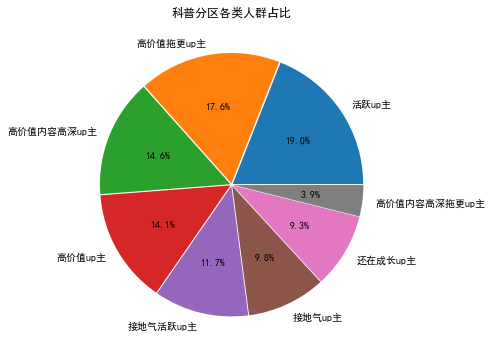

In [215]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']='SimHei'#设置中文显示
plt.figure(figsize=(6,6))#将画布设定为正方形，则绘制的饼图是正圆
explode=[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,]#设定各项距离圆心n个半径
plt.pie(cat['人群占比'],explode=explode,labels=cat['index'],autopct='%1.1f%%')#绘制饼图
plt.title('科普分区各类人群占比')#绘制标题
plt.show()

## 分区up主排行top15

In [216]:
#以点赞率排名
high = IFL.loc[IFL['人群类型']=='高价值up主']
rank = high[['author','L','I','F']].sort_values('L',ascending=False)

In [217]:
rank.head()

,author,L,I,F
149,眼见为识,37.119386,0.13,8.0
133,毕导THU,36.378571,0.08,8.0
5,CodeSheep,35.747117,0.23,1.0
132,比格谢特,27.217548,0.17,6.0
30,三个老爸实验室,22.469110,0.08,8.0


In [218]:
rank.to_excel('rank.xlsx', sheet_name='科学科普',encoding='utf-8')

![title](6.png)